In [85]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn

images = np.load("./images.npy")
labels = np.load("./labels.npy")

input_labels = (labels > 0).astype(dtype=np.float)
images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
images = images.astype(dtype=np.float)
images = images/255

train_images = torch.Tensor(images[0:40000, : ])
cv_images = torch.Tensor(images[40000:45000, : ])
test_images = torch.Tensor(images[45000:50000, :])

#split the labels in to train, validation and test data
train_labels = torch.FloatTensor(input_labels[0:40000])
cv_labels = torch.FloatTensor(input_labels[40000:45000])
test_labels = torch .FloatTensor(input_labels[45000:50000])

# Accuracies When the classification is based on coin flip: 


    The accuracy in this case would be around 50% as there is equal chance of false and true prediction for each input label.
    
 
# Accuracy for majority classifier :
    
    The accuracy of the majority classifier is 80%. The mojority label in this dataset is not apple. Around 20% of 

In [86]:
def accuracy(y,y_hat):
    count = 0;
    for i in range(y.shape[0]):
        if y[i] == y_hat[i]:
            count += 1
    return count/y.shape[0]

def accuracy_random_train():

    import random
    import numpy as np


    x =random.sample(range(0,40000),1000)
    y = np.empty(1000)
    y_hat = np.empty(1000)


    index=0
    
    for i in x:

        images_random = Variable(train_images[i].view(1,676), requires_grad=False)
        y[index] = train_labels[i]

        y_pred = torch.sign(images_random.mm(w1))

        res = y_pred.data[0][0]
    

        if res == -1:
            act_label = 0
        else:
            act_label = 1

        y_hat[index] = act_label
        index += 1

    acc = accuracy(y,y_hat)
   
  
    return acc


    

def accuracy_random_validation():

    import random
    import numpy as np


    x =random.sample(range(0,5000),1000)
    y = np.empty(1000)
    y_hat = np.empty(1000)


    index=0
    
    for i in x:

        images_random = Variable(cv_images[i].view(1,676), requires_grad=False)
        y[index] = cv_labels[i]

        y_pred = torch.sign(images_random.mm(w1))

        res = y_pred.data[0][0]
    

        if res == -1:
            act_label = 0
        else:
            act_label = 1

        y_hat[index] = act_label
        index += 1

    acc = accuracy(y,y_hat)
   
  
    return acc



In [87]:
dtype = torch.FloatTensor


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, D_out = 64, 676, 1

epochs =10;
number_of_steps = 40000
size = (epochs * number_of_steps) / 100
index = 0

# N dimensional arrays to store training and validation accuracies for every 100 steps
accuracy_train = np.empty(int(size))
accuracy_valid = np.empty(int(size))

w1 = Variable(torch.randn(D_in, 1).type(dtype), requires_grad=True)

learning_rate = 0.0001
for i in range(epochs):
    for t in range(number_of_steps):

        x = Variable(train_images[t].view(1,676), requires_grad=False)

        y = train_labels[t]
        if y == 0.0:
            y = -1.0

        y_pred = torch.sign(x.mm(w1))
        
        if t%100 == 0:
            accuracy_train[index] = accuracy_random_train()
            accuracy_valid[index] = accuracy_random_validation()
            index += 1
            
        
        if (y_pred.data[0][0] != y):
            loss = torch.max(Variable(torch.zeros(1)), -y * (torch.matmul(x, w1)))
            loss.backward()
            w1.data -= learning_rate * w1.grad.data
            w1.data = w1.data/torch.norm(w1.data)

            w1.grad.data.zero_()

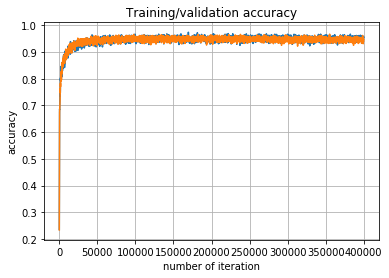

In [88]:
import matplotlib.pyplot as plt


t = np.arange(0,400000,100)
s = accuracy_train
k = accuracy_valid
plt.plot(t, s, t, k)

plt.xlabel('number of iteration')
plt.ylabel('accuracy')
plt.title('Training/validation accuracy')
plt.grid(True)

plt.show()

Question 8: Is this overfitting

This accuracy plot indicates there is no overfitting here. The cross validation error and training errors have increased similarly.